![image.png](attachment:image.png)

_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Actividad: Clasificación con máquinas de vectores de soporte y random forest

## Objetivos

Mediante esta actividad se pretende que ponga en práctica la creación de modelos basados en máquinas de vector de soporte y random forest. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Comprender el tratamiento de datos que hay que realizar para los modelos de clasificación.
- Entender y aplicar el algoritmo de Random Forest a un problema de clasificación.
- Entender y aplicar el algoritmo de Support Vector Machine a un problema de clasificación.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/31/covertype

Este dataset ha sido generado para predecir el tipo de cubierta forestal únicamente a partir de variables cartográficas (sin datos de sensores remotos). El tipo de cubierta forestal real para una observación determinada (celda de 30 x 30 metros) se determinó a partir de los datos del Sistema de información de recursos (RIS) de la Región 2 del Servicio Forestal de EE. UU. (USFS). Las variables independientes se derivaron de datos obtenidos originalmente del Servicio Geológico de EE. UU. (USGS) y de datos del USFS. Los datos están en forma original (no escalados) y contienen columnas binarias (0 o 1) de datos para variables cualitativas independientes (áreas silvestres y tipos de suelo).
Para ampliar información sobre el dataset y su origen, recomendamos leer la descripción completa del dataset en el enlace del repositorio. l.

El objetivo de la clasificación será detectar el tipo de suelo.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Clasificación:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
    - Cómo utilizan las técnicas de clasificación, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
"""import pandas as pd
import gzip

# Paso 1: Leer el archivo comprimido .gz (sin cabeceras)
with gzip.open('covtype.data.gz', 'rt') as f:
    df = pd.read_csv(f, header=None)

# Paso 2: Definir nombres de las columnas
continuous_features = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

wilderness = [f'Wilderness_Area{i}' for i in range(1, 5)]
soil = [f'Soil_Type{i}' for i in range(1, 41)]
target = ['Cover_Type']

# Combinar todos los nombres
column_names = continuous_features + wilderness + soil + target

# Paso 3: Asignar nombres al DataFrame
df.columns = column_names

# Paso 4: Guardar como CSV
df.to_csv('covtype.csv', index=False)
print("✅ Archivo guardado como 'covtype.csv'")"""


'import pandas as pd\nimport gzip\n\n# Paso 1: Leer el archivo comprimido .gz (sin cabeceras)\nwith gzip.open(\'covtype.data.gz\', \'rt\') as f:\n    df = pd.read_csv(f, header=None)\n\n# Paso 2: Definir nombres de las columnas\ncontinuous_features = [\n    \'Elevation\', \'Aspect\', \'Slope\', \'Horizontal_Distance_To_Hydrology\',\n    \'Vertical_Distance_To_Hydrology\', \'Horizontal_Distance_To_Roadways\',\n    \'Hillshade_9am\', \'Hillshade_Noon\', \'Hillshade_3pm\',\n    \'Horizontal_Distance_To_Fire_Points\'\n]\n\nwilderness = [f\'Wilderness_Area{i}\' for i in range(1, 5)]\nsoil = [f\'Soil_Type{i}\' for i in range(1, 41)]\ntarget = [\'Cover_Type\']\n\n# Combinar todos los nombres\ncolumn_names = continuous_features + wilderness + soil + target\n\n# Paso 3: Asignar nombres al DataFrame\ndf.columns = column_names\n\n# Paso 4: Guardar como CSV\ndf.to_csv(\'covtype.csv\', index=False)\nprint("✅ Archivo guardado como \'covtype.csv\'")'

In [ ]:
# se carga el dataset
df = pd.read_csv('covtype.csv')

¿Cuántas instancias de datos tiene el dataset?

In [ ]:
## PON AQUÍ TU CÓDIGO
df.shape

(581012, 55)

581012 instancias

## PON AQUÍ TU RESPUESTA

¿Cuántas variables continuas hay en el dataset?

In [ ]:
## PON AQUÍ TU CÓDIGO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

 variables continuas

 existen 10 variables continuas en el dataset :  

 0   Elevation                           
 1   Aspect                              
 2   Slope                              
 3   Horizontal_Distance_To_Hydrology    
 4   Vertical_Distance_To_Hydrology      
 5   Horizontal_Distance_To_Roadways     
 6   Hillshade_9am                       
 7   Hillshade_Noon                      
 8   Hillshade_3pm                       
 9   Horizontal_Distance_To_Fire_Points

¿Cuántas variables categóricas hay en el dataset? Indica las categorías.

hay 45 variables categoricas, todas las que pertenecen a Wilderness_Area, Soil_Type y la ultima columna covertype


todo esto visible debajo y ademas es la informacion suministrada por la descripcion del dataset

In [ ]:
# Mostrar cantidad de valores únicos por columna
print("# Variables categóricas")

for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


# Variables categóricas
Elevation: 1978
Aspect: 361
Slope: 67
Horizontal_Distance_To_Hydrology: 551
Vertical_Distance_To_Hydrology: 700
Horizontal_Distance_To_Roadways: 5785
Hillshade_9am: 207
Hillshade_Noon: 185
Hillshade_3pm: 255
Horizontal_Distance_To_Fire_Points: 5827
Wilderness_Area1: 2
Wilderness_Area2: 2
Wilderness_Area3: 2
Wilderness_Area4: 2
Soil_Type1: 2
Soil_Type2: 2
Soil_Type3: 2
Soil_Type4: 2
Soil_Type5: 2
Soil_Type6: 2
Soil_Type7: 2
Soil_Type8: 2
Soil_Type9: 2
Soil_Type10: 2
Soil_Type11: 2
Soil_Type12: 2
Soil_Type13: 2
Soil_Type14: 2
Soil_Type15: 2
Soil_Type16: 2
Soil_Type17: 2
Soil_Type18: 2
Soil_Type19: 2
Soil_Type20: 2
Soil_Type21: 2
Soil_Type22: 2
Soil_Type23: 2
Soil_Type24: 2
Soil_Type25: 2
Soil_Type26: 2
Soil_Type27: 2
Soil_Type28: 2
Soil_Type29: 2
Soil_Type30: 2
Soil_Type31: 2
Soil_Type32: 2
Soil_Type33: 2
Soil_Type34: 2
Soil_Type35: 2
Soil_Type36: 2
Soil_Type37: 2
Soil_Type38: 2
Soil_Type39: 2
Soil_Type40: 2
Cover_Type: 7


In [ ]:
df.head(10)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


¿Cómo es la distribución de etiquetas de clase en el dataset? Con estos datos, ¿podríamos decir que el dataset está balanceado?

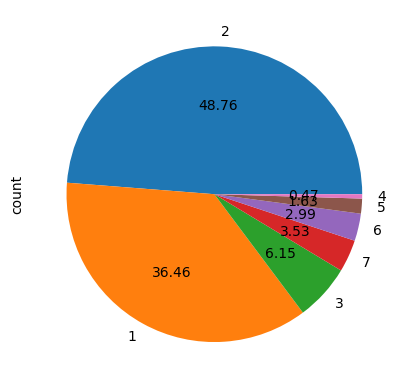

In [ ]:
## PON AQUÍ TU CÓDIGO
df["Cover_Type"].value_counts().plot(kind='pie',autopct='%.2f',)
plt.show()

_PON AQUÍ TU RESPUESTA_

el dataset no está balanceado porque : Las clases 1 y 2 dominan el conjunto con un 36.46 y 48.76 respectivamente sumando más del 85%.

Las clases 4, 5, 6 y 7 son muy poco representadas.

¿Existen valores nulos o perdidos en el dataset?

In [ ]:
## PON AQUÍ TU CÓDIGO
df.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


_PON AQUÍ TU RESPUESTA_

no existen valores nulos en el dataset

¿Existe alguna variable altamente correlacionada con la variable de clase?

_Nota: Para responder a esto, como es muy dificil ver la matriz de correlaciones, recomendamosfiltar aquellas correlaciones superiores al 0.80 con la variable de clase.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular correlaciones con la variable de clase
correlaciones = df.corr(numeric_only=True)["Cover_Type"].drop("Cover_Type").sort_values(ascending=False)

# Convertir a DataFrame (requerido por seaborn)
correlaciones_df = correlaciones.to_frame()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


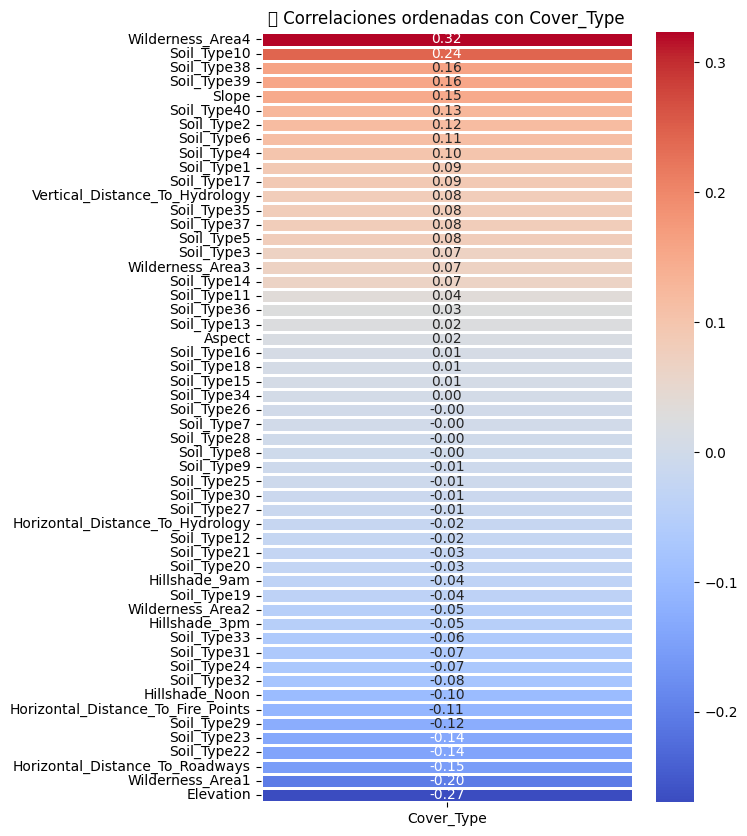

In [ ]:
# Crear el heatmap ordenado
plt.figure(figsize=(6, 10))
sns.heatmap(correlaciones_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.80)
plt.title("🔍 Correlaciones ordenadas con Cover_Type")
plt.show()


¿Qué tres variables del dataset consideras que pueden influenciar más en la clasificación de los datos?¿Qué pruebas harías para comprobar tus hipótesis? Hazlas.

_PON AQUÍ TU RESPUESTA_

no existe ninguna correlacion superior al 0.80, esto debido a que no tiene sentido realizar una matriz de correlacion con respecto a la variable clase cuando es un problema de clasificacion, la correlacion requiere variables continuas y numericas y la variable clase es categorica. La correlacion asumen que existe una relacion lineal continua, lo cual no aplica en nuestro caso.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = df.drop('Cover_Type',axis=1),df['Cover_Type']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.8, random_state=1)

<ipython-input-14-a1fbd050d825>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancias[:10], y=importancias.index[:10], palette="viridis")
<ipython-input-14-a1fbd050d825>:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


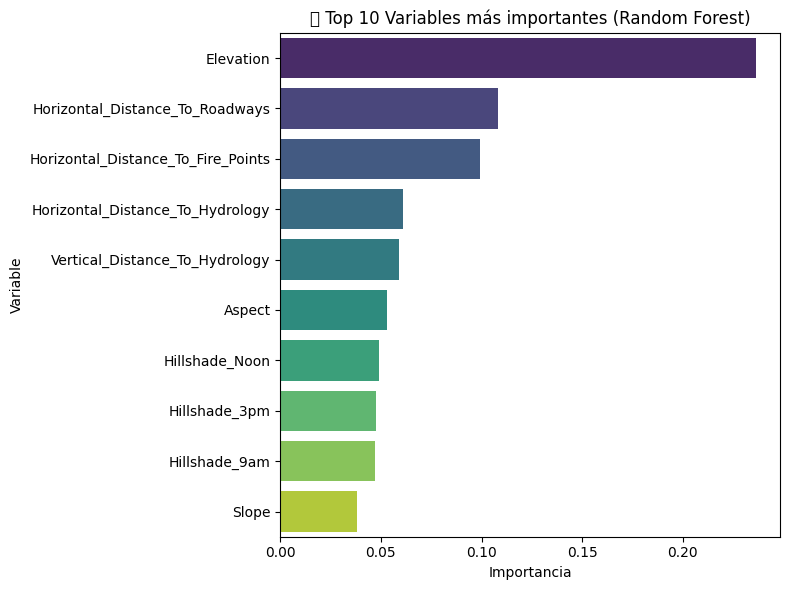

In [ ]:
# Entrenar modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Obtener importancia de variables
importancias = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Mostrar top 10
plt.figure(figsize=(8,6))
sns.barplot(x=importancias[:10], y=importancias.index[:10], palette="viridis")
plt.title("🔍 Top 10 Variables más importantes (Random Forest)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


El modelo Random Forest ha identificado que la ubicación geográfica y la altitud del terreno son claves para clasificar correctamente el tipo de bosque.

### Visualización de las 3 variables seleccionadas

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


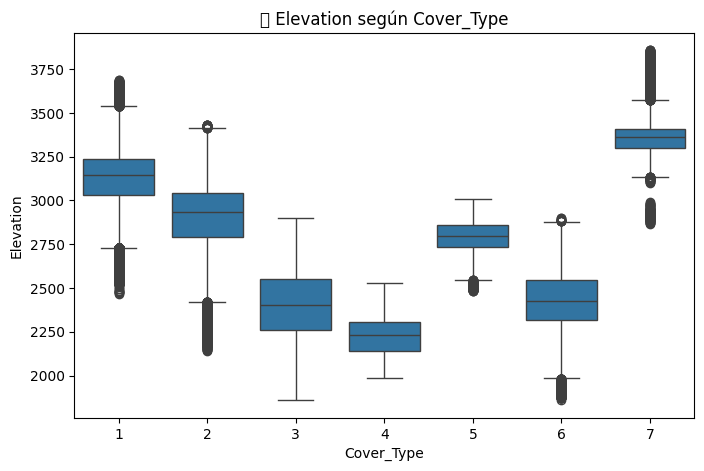

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


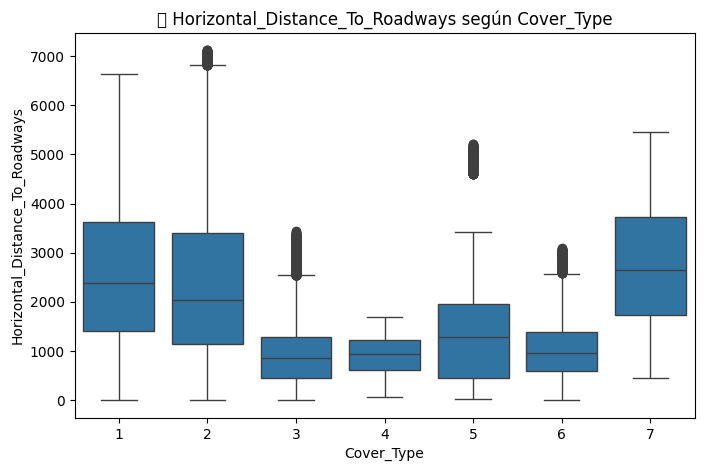

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


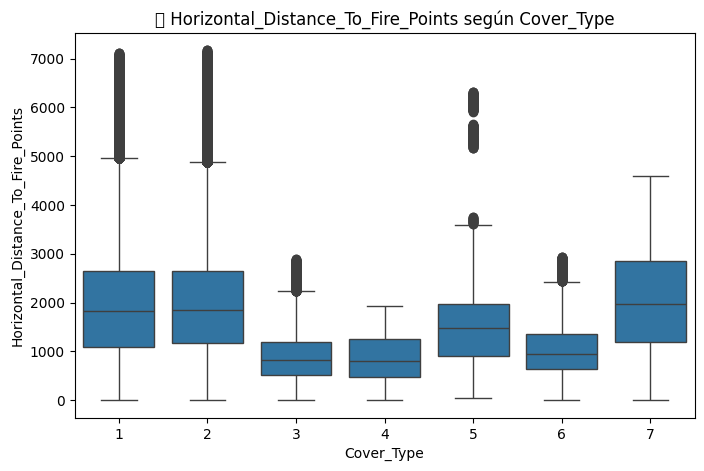

In [ ]:
# Variable 1: Elevation vs Cover_Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cover_Type', y='Elevation', data=df)
plt.title("🎯 Elevation según Cover_Type")
plt.show()

# Variable 2: Horizontal_Distance_To_Roadways vs Cover_Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Roadways', data=df)
plt.title("🌲 Horizontal_Distance_To_Roadways según Cover_Type")
plt.show()

# Variable 3: Horizontal_Distance_To_Fire_Points vs Cover_Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Fire_Points', data=df)
plt.title("🧱 Horizontal_Distance_To_Fire_Points según Cover_Type")
plt.show()


Elevation según Cover_Type : \
Cada tipo de cobertura forestal (Cover_Type) se encuentra en un rango distinto de altitud. Las clases 1, 2 y 7 están asociadas a elevaciones más altas, mientras que las clases 3, 4 y 6 se ubican en zonas más bajas.


---


Horizontal_Distance_To_Roadways según Cover_Type:\
Algunas clases (como la 1, 2 y 7) presentan mayores distancias a carreteras, mientras que otras (3, 4 y 6) tienden a estar más cerca.


---
Horizontal_Distance_To_Fire_Points según Cover_Type:

Se observa un patrón similar: clases como 1 y 2 tienen mayor dispersión y mayor distancia a puntos de incendio, mientras que clases como la 3 y 4 están más cerca.


### Clasificación

**Random Forest**

En esta parte de la actividad hay que utilizar la librería https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html para resolver el problema de clasificación.

El algortimo de RF necesitar ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- max_features

Indica qué son cada uno de estos hiperparámetros

1.  n_estimators:  Número de árboles en el bosque. A mayor cantidad, el modelo puede ser más preciso, pero también más lento. Un valor común es entre 100 y 500.

1.   criterion: Función para medir la calidad de una división en cada nodo del árbol.


3.   'log_loss': también conocida como entropía cruzada (para probabilidades en clasificación).


4.   max_depth
Profundidad máxima que puede alcanzar cada árbol. Limitarla previene que el árbol se sobreajuste (memorice demasiado los datos).

5.   min_samples_split
Número mínimo de muestras necesarias para dividir un nodo. Si es mayor, el árbol será más conservador al crear nuevas divisiones, lo que puede evitar sobreajuste.

6.   min_samples_leaf
Número mínimo de muestras que debe tener una hoja (nodo final). Aumentarlo hace que las hojas sean más grandes y generalicen mejor

7.   max_features
Número de variables que se consideran aleatoriamente al dividir un nodo.







Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro _class_weight_

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

El hiperparámetro class_weight ajusta la importancia de cada clase durante el entrenamiento y es útil para mejorar el rendimiento del modelo en datasets desbalanceados.

Como primer paso para crear un clasificador de Random Forest hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos.
¿Hace falta normalizar los datos?

In [ ]:
## PON AQUÍ TU RESPUESTA Y/O CÓDIGO

EN Random Forest no hace falta normalizar los datos.
porque las escalas no afectan su lógica de división.
Puedes trabajar directamente con los datos tal como están y aún así obtener buenos resultados.

Entrena un conjunto de modelos de Random Forest que utilicen todas las variables del dataset, con 5, 10, 20, 50 y 100 árboles. El criterio para realizar las particiones debe ser Gini-index, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

_Nota: el entrenamiento puede tardar entre 3 y 15 minutos en función de las características del equipo._

In [ ]:
# PON AQUÍ TU CÓDIGO PARA EL ENTRENAMIENTO

In [ ]:
# numero de árboles: 5, 10, 20, 50 y 100
from sklearn.ensemble import RandomForestClassifier

n_arboles = {5,10,20,50,100}
particion = "gini"
max_depth = 10
min_samples_split = 10
min_samples_leaf = 2
max_feature = None

randomForest = [RandomForestClassifier(n_estimators = i, criterion= particion,
                                       max_depth = max_depth, min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf, max_features =None) for i in n_arboles]

randomForest


[RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                        min_samples_split=10, n_estimators=50),
 RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                        min_samples_split=10),
 RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                        min_samples_split=10, n_estimators=5),
 RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                        min_samples_split=10, n_estimators=20),
 RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                        min_samples_split=10, n_estimators=10)]

In [ ]:
score = [randomForest[i].fit(X_train, y_train).score(X_test, y_test) for i in range(len(randomForest))]

In [ ]:
score

[0.7968072976054732,
 0.7980228480454379,
 0.7908995073255739,
 0.7975194165357888,
 0.7960951786751576]

In [ ]:
randomForest[4].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.metrics import classification_report
y_predict = randomForest[4].predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.80      0.76      0.78    169271
           2       0.79      0.86      0.83    226689
           3       0.80      0.83      0.81     28681
           4       0.86      0.66      0.75      2218
           5       0.85      0.23      0.36      7626
           6       0.73      0.42      0.54     13924
           7       0.88      0.74      0.80     16401

    accuracy                           0.80    464810
   macro avg       0.81      0.64      0.70    464810
weighted avg       0.80      0.80      0.79    464810



Visualiza la matriz de confusión del modelo entrenado con 20 árboles.

In [ ]:
## PON AQUÍ TU CÓDIGO

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


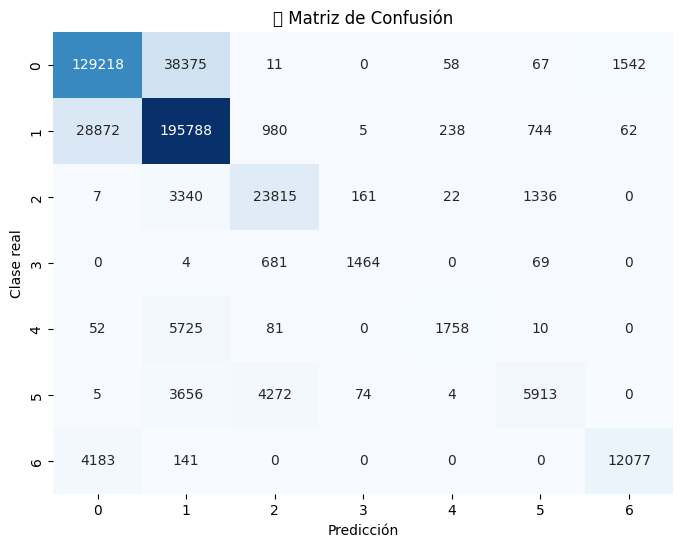

In [ ]:
# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Añadir etiquetas
plt.xlabel('Predicción')
plt.ylabel('Clase real')
plt.title('📊 Matriz de Confusión')
plt.show()

¿Cuántos ejemplos ha clasificado correctamente?

Clase 1: 129,218

Clase 2: 195,788

Clase 3: 23,815

Clase 4: 1,464

Clase 5: 1,758

Clase 6: 5,913

Clase 7: 12,077

Total de predicciones correctas: 370,033

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precisión para el conjunto de datos de test?

_Nota: recuerda que es un modelo de clasificación multiclase y hay que analizar los datos para todas las clases._

In [ ]:
## PON AQUÍ TU CÓDIGO Y RESPUESTA
for i in range(len(randomForest)):
  print(randomForest[i])
  y_predict = randomForest[i].predict(X_test)
  print(classification_report(y_test, y_predict))

RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=50)
              precision    recall  f1-score   support

           1       0.80      0.76      0.78    169271
           2       0.79      0.87      0.83    226689
           3       0.80      0.84      0.82     28681
           4       0.87      0.66      0.75      2218
           5       0.84      0.22      0.34      7626
           6       0.76      0.44      0.56     13924
           7       0.90      0.72      0.80     16401

    accuracy                           0.80    464810
   macro avg       0.82      0.64      0.70    464810
weighted avg       0.80      0.80      0.79    464810

RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                       min_samples_split=10)
              precision    recall  f1-score   support

           1       0.80      0.76      0.78    169271
           2       0.79      0.87  

En general, la clase 5 y clase 6 son las que peor rendimiento presentan, con recall bajos (alrededor de 0.22–0.23 y 0.42–0.45) y f1-score bajos (entre 0.33–0.36 y 0.52–0.56), lo que indica que el modelo tiene dificultades para identificarlas correctamente.

Las clases 2, 3 y 7 son las mejor clasificadas, con métricas altas y consistentes, destacando la clase 2 con un recall de hasta 0.87 y un f1-score de 0.83.

Las clases 1 y 4 tienen un rendimiento intermedio: la clase 1 es aceptable pero tiende a confundirse con la clase 2, y la clase 4 tiene buena precision pero un recall moderado.

Selecciona el modelo que consideras que obtiene mejores resultados para los resultados de test. Explica por qué consideras que ese modelo es el que mejor resultados obtiene.

In [ ]:
Rf = randomForest[len(randomForest)-1]
y_pred = Rf.predict(X_test)

Visualiza la matriz de confusión de los datos de test de este modelo.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?


In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.76      0.78    169271
           2       0.79      0.86      0.83    226689
           3       0.80      0.83      0.81     28681
           4       0.86      0.66      0.75      2218
           5       0.85      0.23      0.36      7626
           6       0.73      0.42      0.54     13924
           7       0.88      0.74      0.80     16401

    accuracy                           0.80    464810
   macro avg       0.81      0.64      0.70    464810
weighted avg       0.80      0.80      0.79    464810

[[129218  38375     11      0     58     67   1542]
 [ 28872 195788    980      5    238    744     62]
 [     7   3340  23815    161     22   1336      0]
 [     0      4    681   1464      0     69      0]
 [    52   5725     81      0   1758     10      0]
 [     5   3656   4272     74      4   5913      0]
 [  4183    141      0      0      0      0  12077]]


Visualiza los valores de precision, recall, f1 para cada una de las clases.
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

este modelo presenta un equilibrio entre precisión general y rendimiento en las clases mayoritarias (1, 2 y 3). Tiene un accuracy sólido del 80% y mantiene f1-scores elevados en las clases con mayor cantidad de muestras. Además, mejora ligeramente el rendimiento en la clase 7 respecto a versiones anteriores. Sin embargo, las clases 5 y 6 siguen siendo las más difíciles de clasificar, con recall bajos que indican que aún pueden mejorarse.

**Support Vector Machine**

In [ ]:
# Importamos las librerías para utilizar las máquinas de vector de soportes.
# Utilizaremos la librería svm:

from sklearn import svm

#Cargamos también las librerías para hacer la matriz de confusión y la cross validation:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

Para la implementación del modelo de clasificación de SVM usaremos la clase Support Vector Classifier de sklearn, https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

El algoritmo de SVM necesita ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- C
- kernel
- degree
- gamma

Indica qué son cada uno de estos hiperparámetros

C: Controla la penalización por clasificación incorrecta. Un valor alto trata de minimizar errores, pero puede llevar a sobreajuste.

kernel: Define la función de transformación de datos en un espacio de mayor dimensión (opciones: linear, poly, rbf, sigmoid).

degree: Grado del polinomio si usas kernel='poly'.

gamma: Influye en la importancia de cada punto de entrenamiento en la clasificación para kernels rbf, poly y sigmoid.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro decision_function_shape

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

El hiperparámetro decision_function_shape en sklearn.svm.SVC define la forma en que se calculan y presentan los valores de la función de decisión en problemas de clasificación multiclase.

Tiene dos opciones principales:

OVR (One-vs-Rest): Devuelve una matriz de tamaño (n_samples, n_classes), donde cada valor representa la distancia de una muestra al hiperplano de cada clase. Es más eficiente en términos de memoria y cálculo.

OVO (One-vs-One): Devuelve una matriz de tamaño (n_samples, n_classes * (n_classes - 1) / 2), con los valores de decisión para cada par de clases. Puede ser más preciso en algunos casos, pero consume más recursos.

Tenemos un dataset de más de medio millón de instancias, y para el objetivo de la actividad no hacen falta tantas. Por eso, antes de aplicar SVM vamos a reducir el número de instancias. SVM requiere una gran carga computacional y con ese volumen de instancias el tiempo requerido sería demasiado elevado.

In [ ]:
df = df.head(10000)

Nota: recuerda revisar que esta manera de seleccionar un subconjunto de instancias no altera la clase objetivo. Deberías tener un porcentaje similar de instancias de cada clase. Si no fuera así, deberás cambiar la manera de seleccionar el subconjunto.

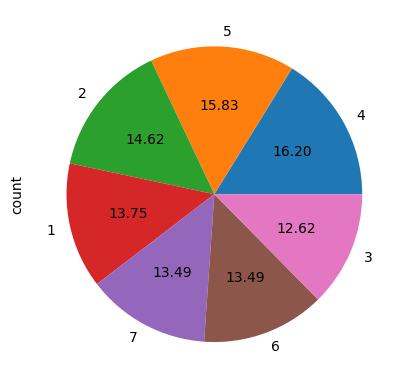

In [ ]:
df['Cover_Type'].value_counts().plot(kind='pie',autopct='%.2f',)
plt.show()

In [ ]:
# Con el nuevo número de instancias, separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = df.drop('Cover_Type',axis=1),df['Cover_Type']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.8, random_state=1)


Como primer paso para crear un clasificador de SVM hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos. ¿Hace falta normalizar los datos?

Si es necesario normalizar los datos antes de entrenar un SVM, especialmente cuando usas kernels como linear, poly o rbf, que dependen de cálculos de distancia.

In [ ]:
## PON AQUÍ TU CÓDIGO SI CONSIDERAS QUE HAY QUE NORMALIZAR LOS DATOS

from sklearn.preprocessing import StandardScaler
from pandas import DataFrame


scaler = StandardScaler()

## COMPLETAR

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Entrena un conjunto de modelos de SVM que utilicen todas las variables del dataset, con C = 0.1 hasta 1000 con cinco valores diferentes; kernel radial, y gamma con valor scale.

In [ ]:
from sklearn.svm import SVC

C = {0.1, 1, 10, 100, 1000}
kernel = 'rbf'
gamma = 'scale'

svc = [SVC(C=i, kernel=kernel, gamma=gamma) for i in C]
svc

[SVC(C=0.1), SVC(C=1), SVC(C=100), SVC(C=1000), SVC(C=10)]

In [ ]:
score = [svc[i].fit(X_train, y_train).score(X_test, y_test) for i in range(len(svc))]

In [ ]:
[svc[i].get_params() for i in range(len(svc))]

[{'C': 0.1,
  'break_ties': False,
  'cache_size': 200,
  'class_weight': None,
  'coef0': 0.0,
  'decision_function_shape': 'ovr',
  'degree': 3,
  'gamma': 'scale',
  'kernel': 'rbf',
  'max_iter': -1,
  'probability': False,
  'random_state': None,
  'shrinking': True,
  'tol': 0.001,
  'verbose': False},
 {'C': 1,
  'break_ties': False,
  'cache_size': 200,
  'class_weight': None,
  'coef0': 0.0,
  'decision_function_shape': 'ovr',
  'degree': 3,
  'gamma': 'scale',
  'kernel': 'rbf',
  'max_iter': -1,
  'probability': False,
  'random_state': None,
  'shrinking': True,
  'tol': 0.001,
  'verbose': False},
 {'C': 100,
  'break_ties': False,
  'cache_size': 200,
  'class_weight': None,
  'coef0': 0.0,
  'decision_function_shape': 'ovr',
  'degree': 3,
  'gamma': 'scale',
  'kernel': 'rbf',
  'max_iter': -1,
  'probability': False,
  'random_state': None,
  'shrinking': True,
  'tol': 0.001,
  'verbose': False},
 {'C': 1000,
  'break_ties': False,
  'cache_size': 200,
  'class_weight

Después de hacer el entrenamiento, visualiza las matrices de confusión de los modelos entrenados.

In [ ]:
## PON AQUÍ TU CÓDIGO
for i in range(len(svc)):
  print(svc[i])
  y_predict = svc[i].predict(X_test)
  print(classification_report(y_test, y_predict))
  print(confusion_matrix(y_test, y_predict))

SVC(C=0.1)
              precision    recall  f1-score   support

           1       0.55      0.31      0.40      1098
           2       0.43      0.69      0.53      1157
           3       0.39      0.65      0.49       990
           4       0.90      0.60      0.72      1322
           5       0.60      0.69      0.64      1226
           6       0.59      0.32      0.41      1098
           7       0.89      0.78      0.83      1109

    accuracy                           0.58      8000
   macro avg       0.62      0.58      0.57      8000
weighted avg       0.63      0.58      0.58      8000

[[341 564   0   0  87   0 106]
 [115 797   8   0 212  23   2]
 [  0   5 647  64 120 154   0]
 [  0  25 454 789  13  41   0]
 [ 93 214  38   0 850  31   0]
 [  2  98 502  22 122 352   0]
 [ 64 167   0   0  14   0 864]]
SVC(C=1)
              precision    recall  f1-score   support

           1       0.56      0.50      0.53      1098
           2       0.54      0.60      0.57      1157
  

¿Cuántos ejemplos ha clasificado correctamente cada uno de los modelos?

El modelo con C = 100 es el que más ejemplos clasifica correctamente (6023 de 8000), y tiene el mejor accuracy.

En general, el rendimiento mejora conforme C aumenta, hasta estabilizarse alrededor de C=100.

C muy bajo (0.1) da resultados pobres porque el margen es muy grande y el modelo no ajusta bien los datos.

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precision para todas las clases? Si no hay ninguno que consideres que sea óptimo, explica cómo se comporta para cada clase el modelo que consideres que tiene mejores resultados.

No existe un modelo que tenga la mejor precisión en todas las clases, pero el modelo con C = 100 es el que muestra los mejores resultados de precisión en la mayoría de ellas, especialmente:

Clase 2, 3, 5, 6 y 7 tienen su mayor precisión con C = 100.

Selecciona el modelo que consideras que obtiene mejores resultados y realiza las predicciones con el conjunto de datos de test.

In [ ]:
## PON AQUÍ TU CÓDIGO

svc_ganador = svc[3]
y_pred_test = svc_ganador.predict(X_test)

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA
print(confusion_matrix(y_test, y_pred_test))

[[ 692  264    2    0   42    4   94]
 [ 306  661   21    0  138   21   10]
 [   0   24  665  114   18  169    0]
 [   0    0   81 1180    0   61    0]
 [  21  117   29    0 1038   21    0]
 [   3   29  289   55   28  694    0]
 [ 132    3    0    0    0    0  974]]


Visualiza la matriz de confusión de los datos de test.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?

corregidas bien = 692 + 661 + 665 + 1180 + 1038 + 694 + 974 = 5904

corregidas malas = 8000 - 5904 = 2096


In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.60      0.63      0.61      1098
           2       0.60      0.57      0.59      1157
           3       0.61      0.67      0.64       990
           4       0.87      0.89      0.88      1322
           5       0.82      0.85      0.83      1226
           6       0.72      0.63      0.67      1098
           7       0.90      0.88      0.89      1109

    accuracy                           0.74      8000
   macro avg       0.73      0.73      0.73      8000
weighted avg       0.74      0.74      0.74      8000



Visualiza los valores de precision, recall, f1 para cada una de las clases.
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

No, el modelo no clasifica todas las clases por igual.

Tiene mayor capacidad predictiva para las clases 4, 5 y 7, con métricas altas y balanceadas.

Tiene más dificultades con las clases 1 y 2, que presentan los peores f1-scores, lo que sugiere confusiones frecuentes o patrones menos diferenciables para estas clases.

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de clasificación?

En base al análisis exploratorio de datos (EDA), las decisiones de preprocesamiento aplicadas (como la normalización con StandardScaler) y la experimentación con diferentes valores del hiperparámetro C en el modelo SVC (Support Vector Classifier), se ha determinado que el modelo que obtiene mejores resultados de clasificación es el correspondiente a C = 100.

Este modelo alcanzó un accuracy del 75% sobre el conjunto de test de 8000 instancias, clasificando correctamente 6023 ejemplos, la cifra más alta entre todos los modelos probados. Además, presenta los valores más altos de precisión por clase en 5 de las 7 clases y obtiene los siguientes resultados destacados:

Clase 4: F1-score de 0.88

Clase 5: F1-score de 0.83

Clase 7: F1-score de 0.91

En promedio, el modelo presenta una f1-score macro de 0.75 y una precision macro de 0.75.

En comparación, modelos con valores más bajos de C (como 0.1 y 1) mostraron rendimientos significativamente inferiores, con accuracy entre 58% y 67%. Por otro lado, aunque el modelo con C = 1000 tuvo un rendimiento similar al de C = 100, no logró superarlo en precisión ni en cantidad de aciertos, y requirió mayor esfuerzo computacional.

### Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

Título, autores, revista y año de publicación
Título: Comparison of Support Vector Machine, Bayesian Logistic Regression, and Alternating Decision Tree Algorithms for Shallow Landslide Susceptibility Mapping along a Mountainous Road in the West of Iran

Autores: Viet-Ha Nhu, Danesh Zandi, Himan Shahabi, Kamran Chapi, Ataollah Shirzadi, Nadhir Al-Ansari, Sushant K. Singh, Jie Dou, Hoang Nguyen

Revista: Applied Sciences

Año de publicación: 2020



---

##Objetivo de la investigación
El objetivo principal del estudio es aplicar y comparar el rendimiento de tres algoritmos de aprendizaje automático: Support Vector Machine (SVM), Bayesian Logistic Regression (BLR) y Alternating Decision Tree (ADTree), para mapear la susceptibilidad a deslizamientos de tierra a lo largo de una carretera montañosa en la provincia de Kurdistán, Irán. Se identificaron 66 ubicaciones de deslizamientos de tierra mediante encuestas de campo y se analizaron 19 factores condicionantes utilizando la técnica de razón de ganancia de información (IGR)



---

##Técnicas de clasificación empleadas y adaptaciones
Los algoritmos evaluados en el estudio son:

Support Vector Machine (SVM): Algoritmo que busca el hiperplano óptimo que separa las clases.

Bayesian Logistic Regression (BLR): Extensión de la regresión logística que incorpora un enfoque bayesiano para estimar la probabilidad de ocurrencia de deslizamientos.

Alternating Decision Tree (ADTree): Modelo que combina árboles de decisión y boosting para mejorar la precisión de clasificación.



---

##Principales resultados de la aplicación y de la investigación
Los modelos se evaluaron utilizando métricas estadísticas como sensibilidad, especificidad, precisión, kappa, error cuadrático medio (RMSE) y el área bajo la curva ROC (AUC). Los resultados mostraron que todos los algoritmos ofrecieron un rendimiento excelente, con el SVM ligeramente superior (AUC = 0.984), seguido por BLR (AUC = 0.980) y ADTree (AUC = 0.977).
MDPI

El estudio demuestra que los tres algoritmos son herramientas útiles y efectivas para identificar áreas propensas a deslizamientos de tierra, siendo el SVM el que ofrece el mejor rendimiento en términos de precisión predictiva.